<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/Boosting_or_Bagging_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [1]:
def load_dataset(url, target_col=None):
    # Baca dataset dari URL
    df = pd.read_csv(url)

    # Gunakan kolom terakhir sebagai target jika belum ditentukan
    if target_col is None:
        target_col = df.columns[-1]

    # Tampilkan informasi dasar tentang dataset
    print(f"✅ Data berhasil dimuat dari: {url}")
    print(f"Jumlah baris dan kolom: {df.shape}")
    print(f"Nama kolom: {list(df.columns)}")

    # Bersihkan data:
    # - Hapus baris yang mengandung nilai kosong
    df_clean = df.dropna().reset_index(drop=True)

    # - Ubah fitur kategorikal menjadi numerik menggunakan One-Hot Encoding
    df_encoded = pd.get_dummies(df_clean, drop_first=True)

    # Pisahkan fitur dan label target
    X = df_encoded.drop(columns=[target_col])
    y = df_encoded[target_col]

    return df_encoded, X, y


In [2]:
def train_evaluate_boosting(X, y, test_size=0.2, random_state=42,
                            n_estimators=100, learning_rate=0.1, max_depth=3):
    # Pisahkan data menjadi train dan test set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    # Bangun model Gradient Boosting
    gbr = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=random_state
    )

    # Latih model dengan data training
    gbr.fit(X_train, y_train)

    # Lakukan prediksi di kedua set
    pred_train = gbr.predict(X_train)
    pred_test = gbr.predict(X_test)

    # Hitung metrik evaluasi pada data test
    mse = mean_squared_error(y_test, pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_test)

    print("\n📊 Evaluasi pada Data Uji:")
    print(f"- MSE   : {mse:.4f}")
    print(f"- RMSE  : {rmse:.4f}")
    print(f"- R²    : {r2:.4f}")

    # Visualisasi hasil
    plt.figure(figsize=(14, 6))

    # Plot 1: Scatter nilai aktual vs prediksi
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=pred_test, alpha=0.6, color='steelblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Nilai Aktual")
    plt.ylabel("Prediksi")
    plt.title("Prediksi vs Nilai Aktual")

    # Plot 2: Distribusi error (residual)
    residuals = y_test - pred_test
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, color='seagreen')
    plt.xlabel("Error (Residual)")
    plt.title("Distribusi Error Prediksi")

    plt.tight_layout()
    plt.show()

    # Plot feature importance jika fiturnya lebih dari satu
    if X.shape[1] > 1:
        importances = pd.Series(gbr.feature_importances_, index=X.columns)
        plt.figure(figsize=(10, 12))
        importances.sort_values().plot(kind='barh', color='teal')
        plt.title("Pentingnya Setiap Fitur")
        plt.xlabel("Skor Importance")
        plt.tight_layout()
        plt.show()

    # Kembalikan hasil evaluasi dalam bentuk dictionary
    return {
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }



🔍 Mengevaluasi Dataset: Automobile
✅ Data berhasil dimuat dari: https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv
Jumlah baris dan kolom: (205, 26)
Nama kolom: ['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size', 'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style', 'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses', 'symboling']

📊 Evaluasi pada Data Uji:
- MSE   : 3339016.9019
- RMSE  : 1827.2977
- R²    : 0.8124


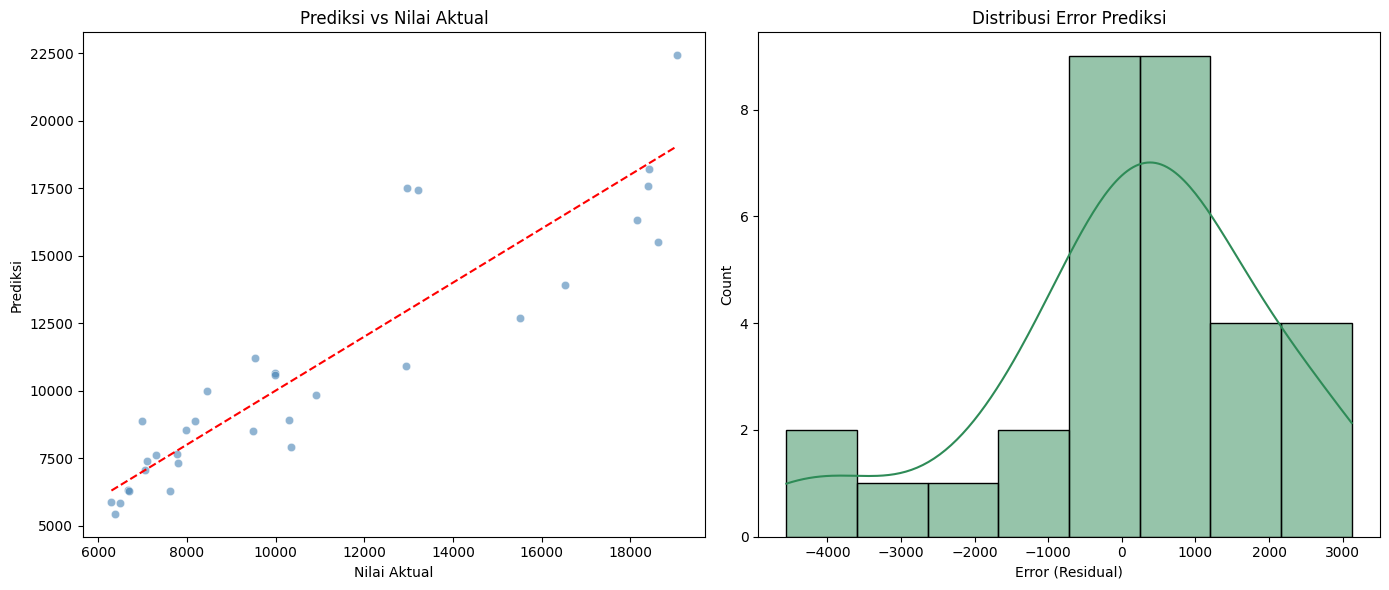

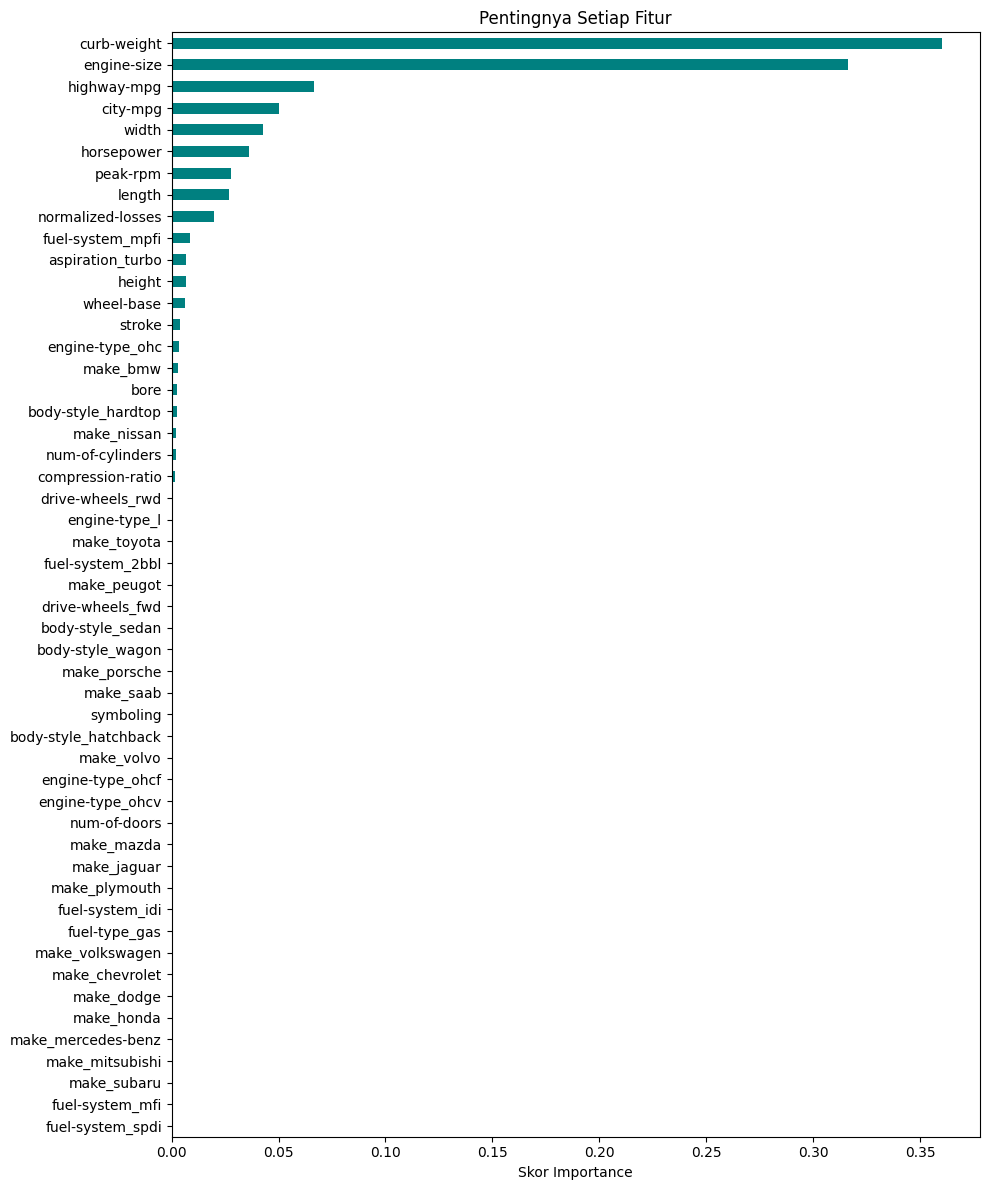


📈 Ringkasan Evaluasi untuk 'Automobile':
- MSE: 3339016.9019
- RMSE: 1827.2977
- R2: 0.8124

🔍 Mengevaluasi Dataset: Infrared
✅ Data berhasil dimuat dari: https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/Infrared.csv
Jumlah baris dan kolom: (1020, 34)
Nama kolom: ['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'aveOralM']

📊 Evaluasi pada Data Uji:
- MSE   : 0.0588
- RMSE  : 0.2424
- R²    : 0.7045


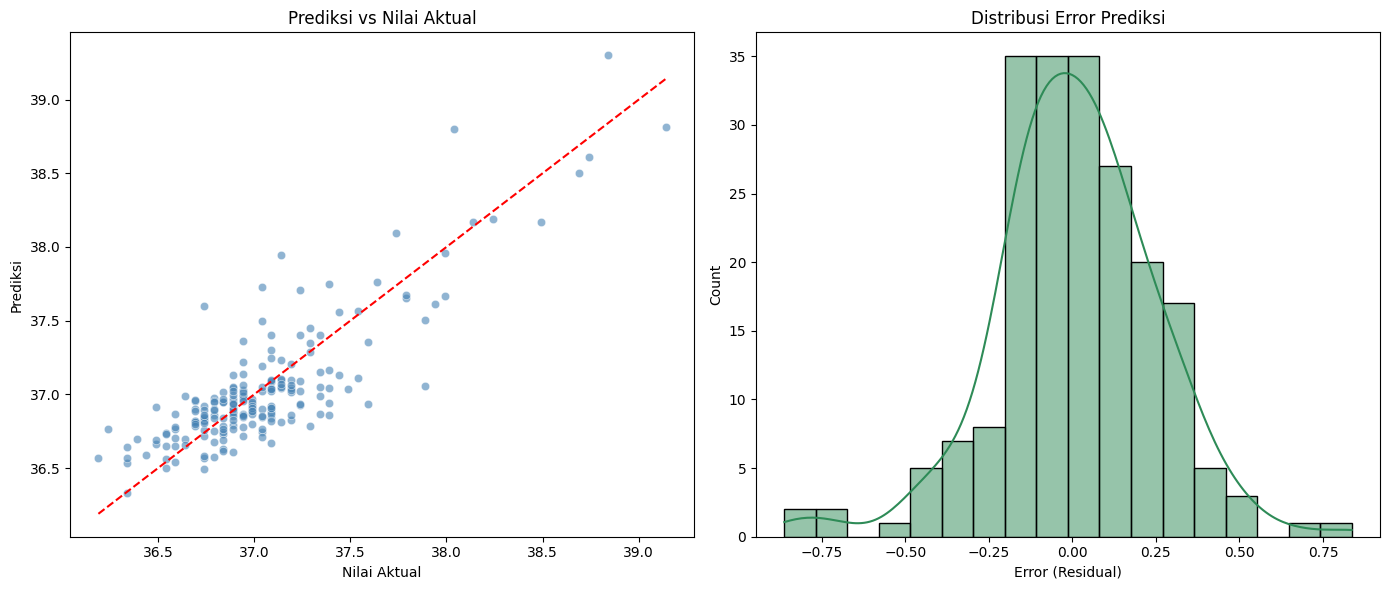

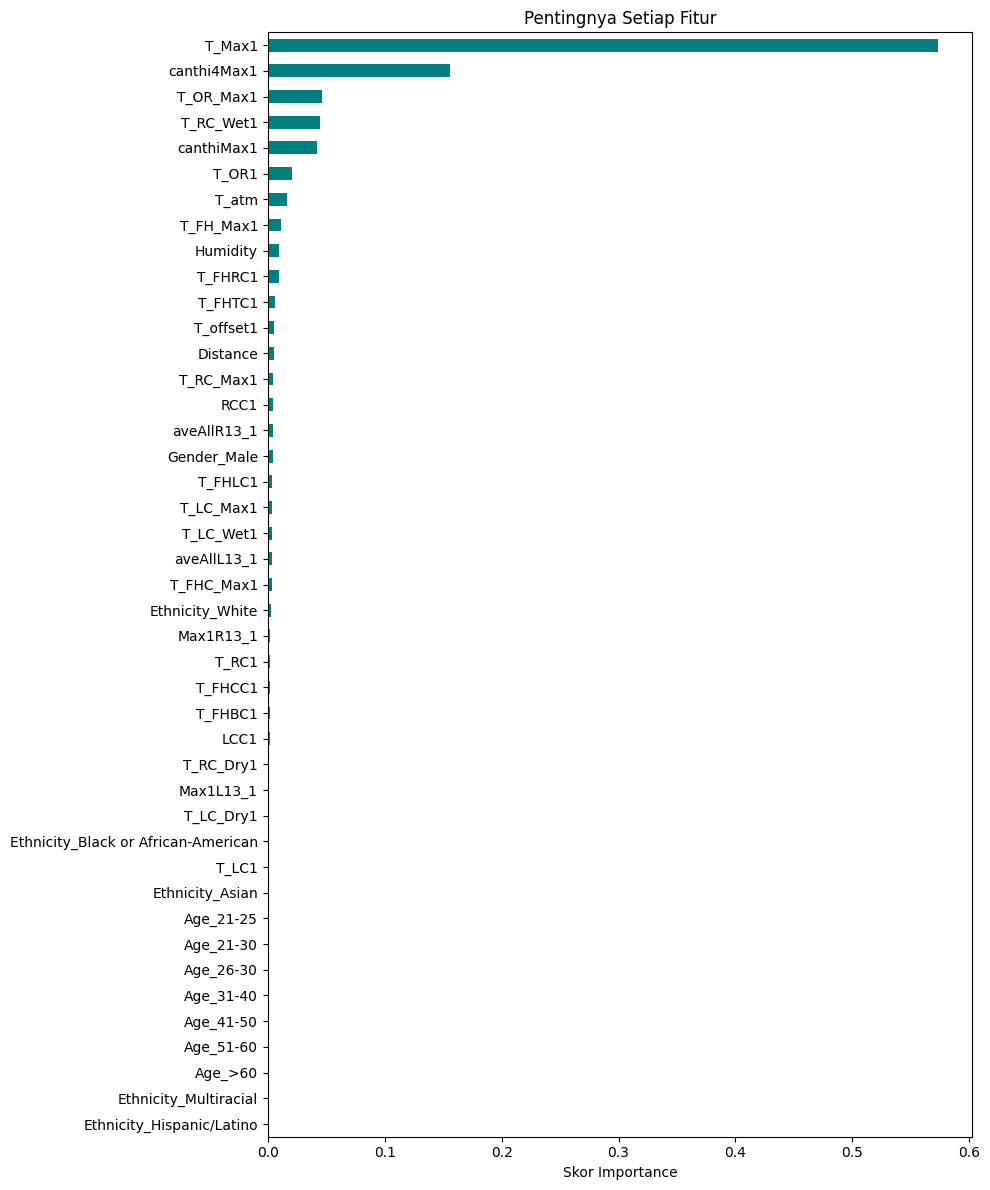


📈 Ringkasan Evaluasi untuk 'Infrared':
- MSE: 0.0588
- RMSE: 0.2424
- R2: 0.7045

🔍 Mengevaluasi Dataset: BostonHousing
✅ Data berhasil dimuat dari: https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Jumlah baris dan kolom: (506, 14)
Nama kolom: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

📊 Evaluasi pada Data Uji:
- MSE   : 6.2089
- RMSE  : 2.4918
- R²    : 0.9153


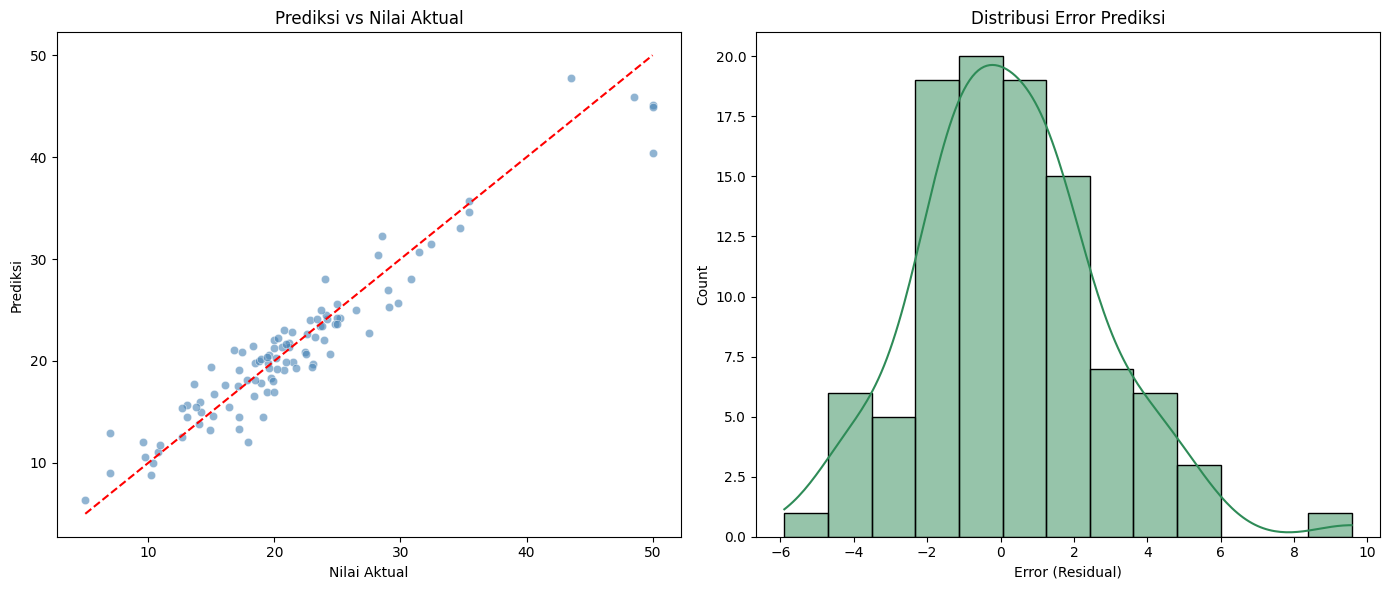

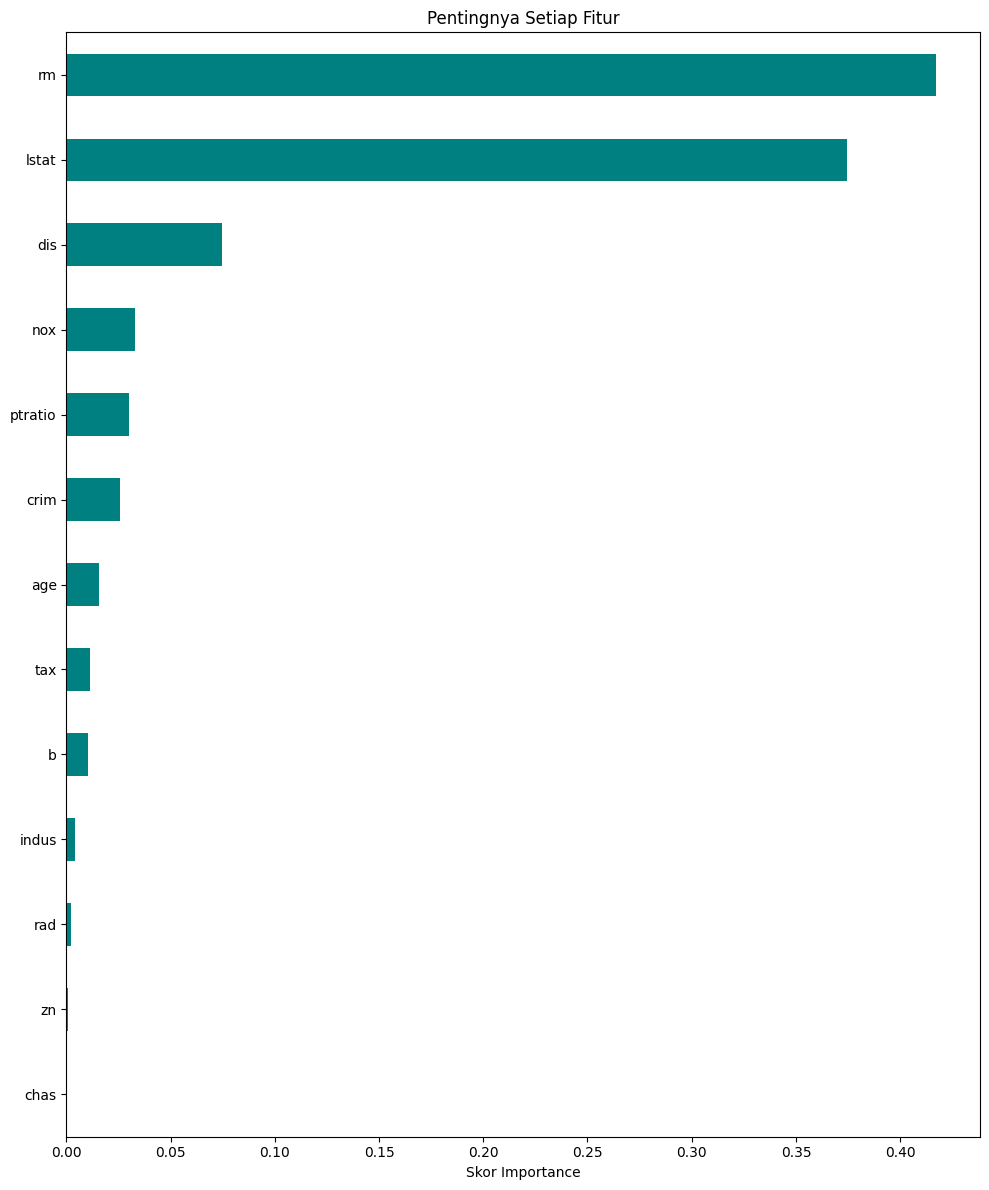


📈 Ringkasan Evaluasi untuk 'BostonHousing':
- MSE: 6.2089
- RMSE: 2.4918
- R2: 0.9153


In [7]:
# Daftar dataset yang akan diuji
datasets = {
    "Automobile": {
        "url": "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv",
        "target_col": "price"
    },
    "Infrared": {
        "url": "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/Infrared.csv",
        "target_col": None  # Jika tidak ditentukan, pakai kolom terakhir
    },
    "BostonHousing": {
        "url": "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv",
        "target_col": "medv"
    }
}

# Dictionary untuk menyimpan hasil evaluasi dari setiap dataset
hasil_evaluasi = {}

# Iterasi tiap dataset dan evaluasi model
for nama_dataset, info in datasets.items():
    print("\n" + "="*70)
    print(f"🔍 Mengevaluasi Dataset: {nama_dataset}")
    print("="*70)

    # Load dan siapkan data
    df, X, y = load_dataset(info["url"], target_col=info["target_col"])

    # Jalankan training dan evaluasi
    hasil = train_evaluate_boosting(X, y)
    hasil_evaluasi[nama_dataset] = hasil

    print(f"\n📈 Ringkasan Evaluasi untuk '{nama_dataset}':")
    for metrik, nilai in hasil.items():
        print(f"- {metrik}: {nilai:.4f}")



In [8]:
# Tampilkan ringkasan evaluasi dalam bentuk DataFrame
summary_df = pd.DataFrame(hasil_evaluasi).T  # .T untuk transpose agar dataset jadi baris
summary_df.index.name = 'Dataset'

print("\n" + "="*70)
print("📊 RINGKASAN EVALUASI SEMUA DATASET")
print("="*70)
display(summary_df.round(4))  # Membulatkan angka desimal untuk tampilan



📊 RINGKASAN EVALUASI SEMUA DATASET


,MSE,RMSE,R2
Dataset,,,
Automobile,3.339017e+06,1827.2977,0.8124
Infrared,5.880000e-02,0.2424,0.7045
BostonHousing,6.208900e+00,2.4918,0.9153


# Penjelasan Matematika Model Boosting dan Evaluasi Metrik

## A. Dasar-dasar Gradient Boosting

Gradient Boosting merupakan metode ensemble yang membangun model secara aditif:
$$
f(x) = f_0(x) + \sum_{m=1}^{M} \gamma_m h_m(x)
$$
dimana:
- $f_0(x)$ adalah prediksi awal, misalnya rata-rata dari target:
  $$
  f_0(x) = \frac{1}{n}\sum_{i=1}^{n} y_i
  $$
- $h_m(x)$ adalah model dasar (base learner), misalnya pohon keputusan, yang di-fit terhadap residual.
- $\gamma_m$ adalah koefisien (learning rate) untuk iterasi ke-$m$.

Pada setiap iterasi, dilakukan langkah-langkah berikut:
1. **Inisialisasi:**  
   Mulai dengan model awal $f_0(x)$.
2. **Komputasi Residual:**  
   Menghitung error atau residual sebagai turunan negatif dari fungsi loss. Untuk squared error:
   $$
   r_i^{(m)} = y_i - f_{m-1}(x_i)
   $$
3. **Fit Base Learner:**  
   Melatih $h_m(x)$ untuk memprediksi residual $r_i^{(m)}$.
4. **Update Model:**  
   Memperbarui prediksi:
   $$
   f_m(x) = f_{m-1}(x) + \eta h_m(x)
   $$
   dengan $\eta$ sebagai learning rate.

## B. Evaluasi Model: Metrik yang Digunakan

1. **Mean Squared Error (MSE):**
   $$
   \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
   $$
   Metrik ini mengukur rata-rata kuadrat selisih antara nilai aktual $y_i$ dan nilai prediksi $\hat{y}_i$.

2. **Root Mean Squared Error (RMSE):**
   $$
   \text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
   $$
   RMSE memberikan error dalam satuan yang sama dengan target, sehingga lebih intuitif dipahami.

3. **Coefficient of Determination (\(R^2\)):**
   $$
   R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
   $$
   Di mana $\bar{y}$ adalah rata-rata dari $y_i$. Nilai $R^2$ menunjukkan proporsi variansi dalam target yang dapat dijelaskan oleh model.

Penjelasan dan rumus ini merupakan dasar untuk memahami bagaimana model boosting melakukan optimasi dan bagaimana performa model diukur menggunakan metrik evaluasi.
